Algorithm: quick_sort, Execution Time: 0.0697329044342041 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: heap_sort, Execution Time: 0.13506054878234863 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: merge_sort, Execution Time: 0.08527922630310059 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: radix_sort, Execution Time: 0.09028935432434082 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: bucket_sort, Execution Time: 0.04236578941345215 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: tim_sort, Execution Time: 0.06452322006225586 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: quick_sort, Execution Time: 0.04025983810424805 seconds, Input Size: 10000, Scenario: Scenario 2
Algorithm: heap_sort, Execution Time: 0.08353137969970703 seconds, Input Size: 10000, Scenario: Scenario 2
Algorithm: merge_sort, Execution Time: 0.06121349334716797 seconds, Input Size: 10000, Scenario: Scenario 2
Algorithm: radix_sort, Execution

Algorithm: tim_sort, Execution Time: 1.3908610343933105 seconds, Input Size: 100000, Scenario: Scenario 1
Algorithm: quick_sort, Execution Time: 0.680274486541748 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: heap_sort, Execution Time: 2.0415244102478027 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: merge_sort, Execution Time: 1.1481199264526367 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: radix_sort, Execution Time: 0.7268376350402832 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: bucket_sort, Execution Time: 0.560056209564209 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: tim_sort, Execution Time: 1.0672023296356201 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: quick_sort, Execution Time: 1.0958800315856934 seconds, Input Size: 100000, Scenario: Scenario 3
Algorithm: heap_sort, Execution Time: 1.7638678550720215 seconds, Input Size: 100000, Scenario: Scenario 3
Algorithm: merge_sort, Execution Ti

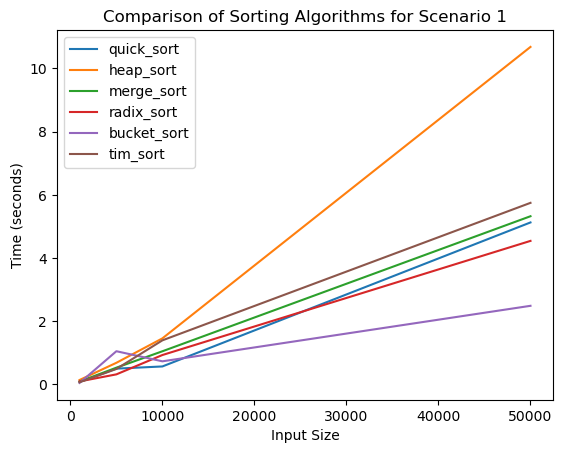

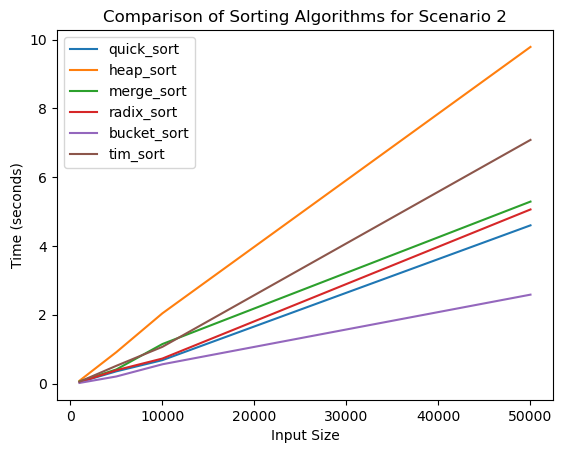

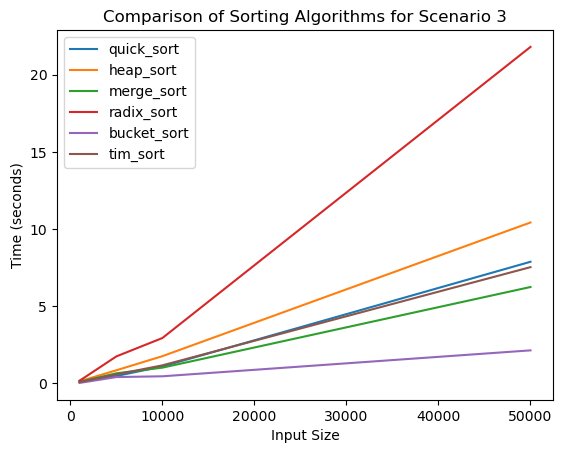

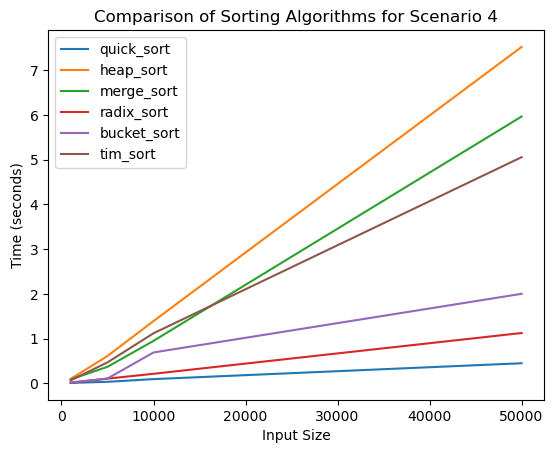

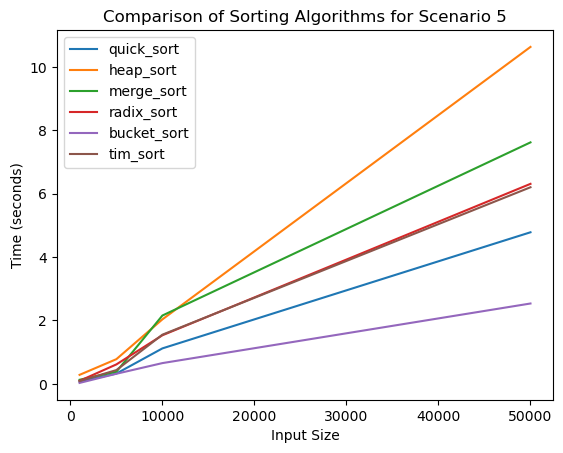

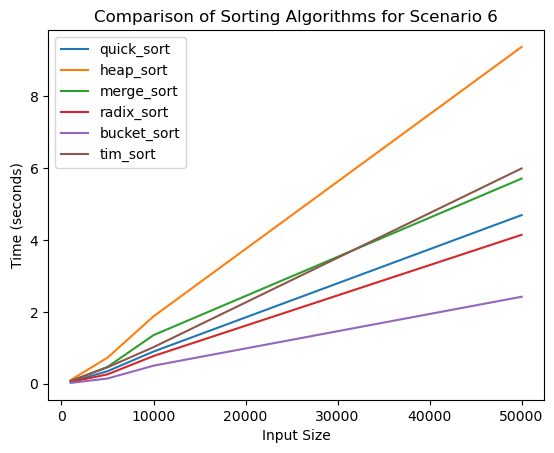

In [14]:
import random
import time
import matplotlib.pyplot as plt
from math import log

# Quick Sort
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Heap Sort
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[l] > arr[largest]:
        largest = l

    if r < n and arr[r] > arr[largest]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

# Merge Sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

# Radix Sort
def counting_sort(arr, exp):
    output = [0] * len(arr)
    count = [0] * 10

    for i in range(len(arr)):
        index = arr[i] // exp
        count[index % 10] += 1

    for i in range(1, 10):
        count[i] += count[i - 1]

    i = len(arr) - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    i = 0
    for i in range(len(arr)):
        arr[i] = output[i]

def radix_sort(arr):
    max_val = max(arr)
    exp = 1
    while max_val // exp > 0:
        counting_sort(arr, exp)
        exp *= 10

# Bucket Sort
def bucket_sort(arr):
    if len(arr) == 0:
        return arr
    max_val = max(arr)
    min_val = min(arr)
    bucket_range = (max_val - min_val) / len(arr)
    if bucket_range == 0:
        return arr
    buckets = [[] for _ in range(len(arr))]
    for num in arr:
        index = int((num - min_val) // bucket_range)
        if index != len(arr):
            buckets[index].append(num)
        else:
            buckets[index - 1].append(num)
    for bucket in buckets:
        insertion_sort(bucket)
    i = 0
    for bucket in buckets:
        for num in bucket:
            arr[i] = num
            i += 1

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

# Tim Sort
def insertion_sort_tim(arr, left=0, right=None):
    if right is None:
        right = len(arr) - 1

    for i in range(left + 1, right + 1):
        key = arr[i]
        j = i - 1
        while j >= left and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

def merge_tim(arr, l, m, r):
    len1, len2 = m - l + 1, r - m
    left, right = arr[l:m + 1], arr[m + 1:r + 1]
    i, j, k = 0, 0, l

    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1

    while i < len1:
        arr[k] = left[i]
        i += 1
        k += 1

    while j < len2:
        arr[k] = right[j]
        j += 1
        k += 1

# Tim Sort
def tim_sort(arr):
    MIN_MERGE = 32 

    def calc_min_run(n):
        r = 0
        while n >= MIN_MERGE:
            r |= n & 1
            n >>= 1
        return n + r

    def insertion_sort(arr, left, right):
        for i in range(left + 1, right + 1):
            key = arr[i]
            j = i - 1
            while j >= left and arr[j] > key:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    def merge(arr, l, m, r):
        len1, len2 = m - l + 1, r - m
        left, right = [], []
        for i in range(0, len1):
            left.append(arr[l + i])
        for i in range(0, len2):
            right.append(arr[m + 1 + i])

        i, j, k = 0, 0, l
        while i < len1 and j < len2:
            if left[i] <= right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len1:
            arr[k] = left[i]
            k += 1
            i += 1

        while j < len2:
            arr[k] = right[j]
            k += 1
            j += 1

    n = len(arr)
    min_run = calc_min_run(n)

    for start in range(0, n, min_run):
        end = min(start + min_run - 1, n - 1)
        insertion_sort(arr, start, end)

    size = min_run
    while size < n:
        for left in range(0, n, 2 * size):
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))
            if mid < right:
                merge(arr, left, mid, right)
        size *= 2

# Adding Tim Sort to sorting algorithms list
sorting_algorithms = [quick_sort, heap_sort, merge_sort, radix_sort, bucket_sort, tim_sort]

# To Generate test data for different scenarios
def generate_data_scenario_1(n):
    return [random.randint(0, n) for _ in range(n)]

def generate_data_scenario_2(n, k):
    return [random.randint(0, k) for _ in range(n)]

def generate_data_scenario_3(n):
    return [random.randint(0, n**3) for _ in range(n)]

def generate_data_scenario_4(n):
    return [random.randint(0, int(log(n))) for _ in range(n)]

def generate_data_scenario_5(n):
    return [random.randint(0, n) * 1000 for _ in range(n)]

def generate_data_scenario_6(n):
    data = [i for i in range(n)]
    # Swapping log n/2 randomly chosen values
    indices_to_swap = random.sample(range(n), n // 2)
    for idx in indices_to_swap:
        data[idx], data[random.randint(0, n-1)] = data[random.randint(0, n-1)], data[idx]
    return data
def compare_sorting_algorithms_for_scenarios():
    scenarios = {
        "Scenario 1": generate_data_scenario_1,
        "Scenario 2": generate_data_scenario_2,
        "Scenario 3": generate_data_scenario_3,
        "Scenario 4": generate_data_scenario_4,
        "Scenario 5": generate_data_scenario_5,
        "Scenario 6": generate_data_scenario_6
    }

    sorting_algorithms = [quick_sort, heap_sort, merge_sort, radix_sort, bucket_sort, tim_sort]
    results = {alg.__name__: {scenario: [] for scenario in scenarios} for alg in sorting_algorithms}

    sizes = [10000, 50000, 100000, 500000]  # Input size

    for size in sizes:
        for scenario, data_generator in scenarios.items():
            data = data_generator(size) if scenario != "Scenario 2" else data_generator(size, size//2)
            for sort_alg in sorting_algorithms:
                sorted_data = data.copy()
                start_time = time.time()
                sort_alg(sorted_data)
                end_time = time.time()
                execution_time = end_time - start_time
                print(f"Algorithm: {sort_alg.__name__}, Execution Time: {execution_time} seconds, Input Size: {size}, Scenario: {scenario}")
                results[sort_alg.__name__][scenario].append(execution_time)

    return results

# For Comparing sorting algorithms for each scenario and plot results
sorting_results_for_scenarios = compare_sorting_algorithms_for_scenarios()
plot_results_for_scenarios(sorting_results_for_scenarios)


Algorithm: my_quick_sort, Execution Time: 0.061660051345825195 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: my_heap_sort, Execution Time: 0.12833762168884277 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: my_merge_sort, Execution Time: 0.07497525215148926 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: my_radix_sort, Execution Time: 0.05846524238586426 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: my_bucket_sort, Execution Time: 0.040175676345825195 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: my_tim_sort, Execution Time: 0.10606837272644043 seconds, Input Size: 10000, Scenario: Scenario 1
Algorithm: my_quick_sort, Execution Time: 0.05446648597717285 seconds, Input Size: 10000, Scenario: Scenario 2
Algorithm: my_heap_sort, Execution Time: 0.11897468566894531 seconds, Input Size: 10000, Scenario: Scenario 2
Algorithm: my_merge_sort, Execution Time: 0.06368207931518555 seconds, Input Size: 10000, Scenario: Scenario 2
Al

Algorithm: my_radix_sort, Execution Time: 0.6737322807312012 seconds, Input Size: 100000, Scenario: Scenario 1
Algorithm: my_bucket_sort, Execution Time: 0.39553022384643555 seconds, Input Size: 100000, Scenario: Scenario 1
Algorithm: my_tim_sort, Execution Time: 0.9138193130493164 seconds, Input Size: 100000, Scenario: Scenario 1
Algorithm: my_quick_sort, Execution Time: 0.6171793937683105 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: my_heap_sort, Execution Time: 1.4114344120025635 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: my_merge_sort, Execution Time: 0.8049697875976562 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: my_radix_sort, Execution Time: 0.6400091648101807 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: my_bucket_sort, Execution Time: 0.2934839725494385 seconds, Input Size: 100000, Scenario: Scenario 2
Algorithm: my_tim_sort, Execution Time: 0.9582593441009521 seconds, Input Size: 100000, Scenario: Scenario 2
Alg

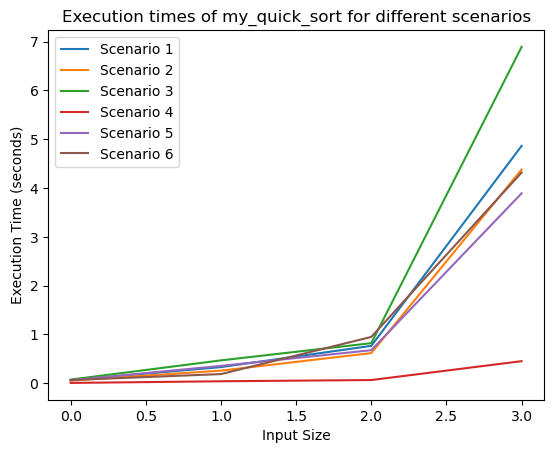

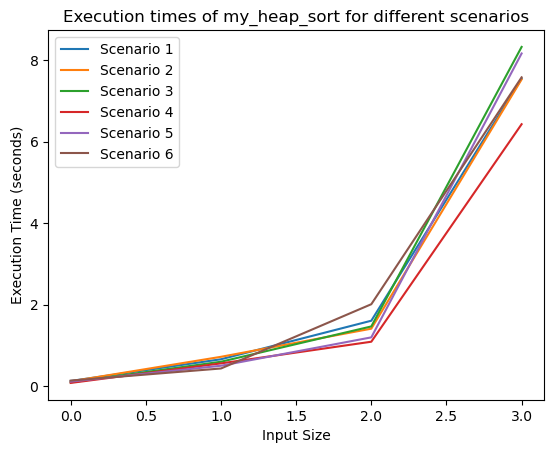

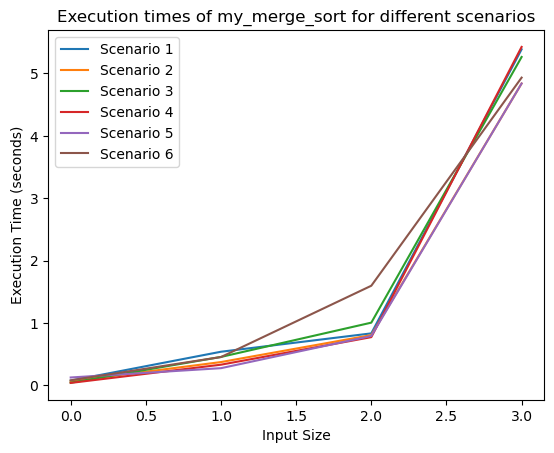

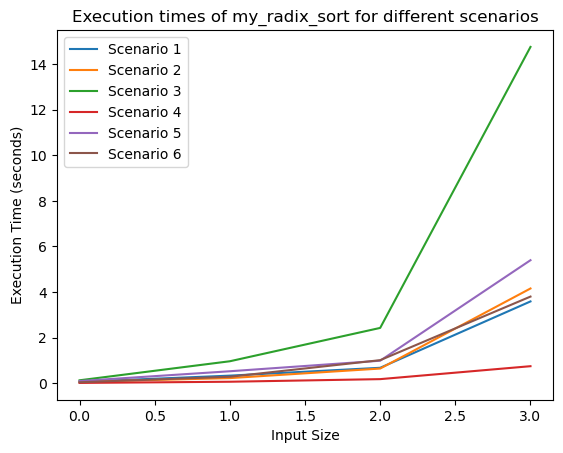

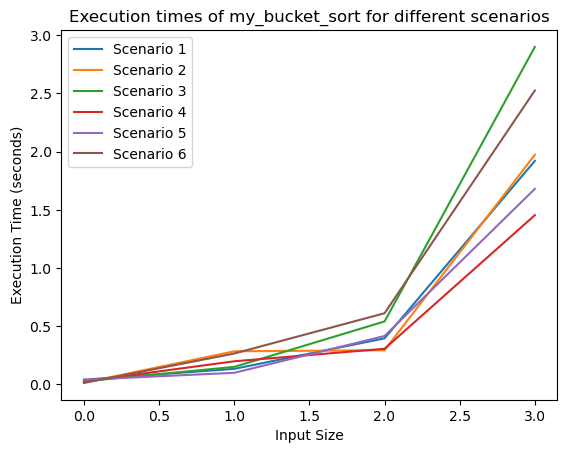

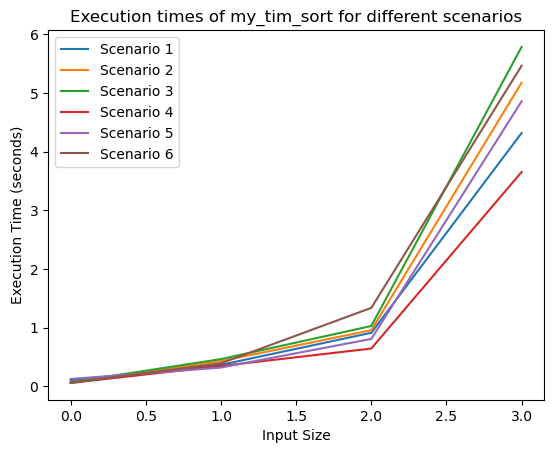